# **Projet 3 - <span style="color:#35B890">Concevoir une application au service de la santé publique</span>**

**<span style="color:#35B890">Objectif de la mission</span>** - Réponse à l'AAP de <a href="https://www.santepubliquefrance.fr/">Santé public France</a> concernant une idée d'application en lien avec l'alimentation.

**<span style="color:#35B890">Source des données</span>** - Les données sont issues de l'association <a href="https://world.openfoodfacts.org/">Open Food Facts</a> qui a pour but de mettre à disposition des consommateurs les données des produits alimentaires. Pour une meilleure compréhension des données, une description est <a href="">disponible à cette page</a>.

**<span style="color:#35B890">Présentation de l'application choisie</span>**
<p>Dans le cadre du développement de nouveaux produits destinés à améliorer la qualité de vie et le bien-être de la population, le service R&D développe un outil permetant de rééquilibrer les habitudes alimentaire. Le but est de restranscrire les repas en informations nutritionnelles afin de proposer des menus plus équilibrés. Les produits issus de territoires français seront utilisés pour la conception des menus ainsi que la qualité des nutriments.</p>

**<span style="color:#35B890">Les différentes étapes:</span>**
1. Collecte des données (repas consommés)
2. Transcription en valeurs nutrionnelles
3. Comparaison entre la consommation et les Apports Nutritionnels Conseillés (ANC)
4. Analyse des habitudes de consommation (Régime alimentaire, allergies, ...)
5. Proposition de menus respectants les ANC et les Apports Journaliers recommandés (AJR)

---

**<span style="color:#35B890">Objectif du notebook</span> - Concevoir une base de données exploitable pour la réalisation du projet d'application**

**Notebook de nettoyage:**
1. Description des données
2. Nettoyage des données
   1. *Suppression des données inexploitables*
   2. *Sélection des produits issus des territoires français*
   3. *Gestion des colonnes par section*
      1. *Informations sur la fiche produit*
      2. *Tags*
      3. *Ingrédients et additifs éventuels*
      4. *Données diverses*
   4. *Traitement des informations nutritionnelles*
3. Imputation des données manquantes (nutriments)
   1. *Moyenne par colonne*
   2. *Moyenne par catégorie*
   3. *KNN-Imputer*

**Notebook d'analyse:**

4. Analyse statistique des données

## **0. Importation des librairies et des données**
---

In [1]:
# import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
import random
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# from matplotlib.ticker import ScalarFormatter

In [2]:
# Import the dataset MAC
#food = "/Users/remi/Documents/FoodFact/foodfact.csv"
#df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [3]:
# Import the dataset PC
food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact.csv"
df_food = pd.read_csv(food, sep="\t", low_memory=False)

### Charte graphique

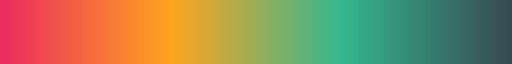

In [4]:
# Define the color
first_color = "#EB2D5F"  # Couleur pour les valeurs inférieures
under_color = '#ffa51f'  # Couleur pour les valeurs inférieures
over_color = '#384B52'   # Couleur pour les valeurs supérieures
# Create a personal color map 
colors = [first_color,under_color, '#35B890', over_color]
n_bins = 100
cmap_name = 'custom_colormap'
palette = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
palette

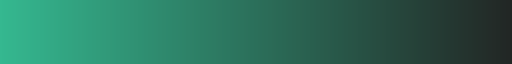

In [5]:
# Continuous colour palette for the various graphics
palette_b = sns.dark_palette("#35B890", reverse=True, as_cmap=True)
palette_b

In [6]:
# Colour palette for the various graphics
palette_map = sns.color_palette("dark:#35B890", n_colors=len(df_food.isnull().sum()),as_cmap=False)
palette_map

[(0.13521666301722216, 0.15155479605253716, 0.1443874221608451),
 (0.135501472720115, 0.15379014441096242, 0.14603572984787294),
 (0.13607109212590074, 0.15826084112781297, 0.1493323452219286),
 (0.1363559018287936, 0.16049618948623823, 0.1509806529089564),
 (0.13692552123457932, 0.16496688620308878, 0.15427726828301208),
 (0.1372103309374722, 0.16720223456151403, 0.1559255759700399),
 (0.1377799503432579, 0.17167293127836458, 0.15922219134409554),
 (0.13834956974904364, 0.1761436279952151, 0.16251880671815122),
 (0.1386343794519365, 0.17837897635364036, 0.16416711440517903),
 (0.13920399885772222, 0.1828496730704909, 0.16746372977923468),
 (0.13948880856061507, 0.18508502142891617, 0.16911203746626252),
 (0.1400584279664008, 0.18955571814576672, 0.17240865284031817),
 (0.14062804737218654, 0.19402641486261724, 0.17570526821437382),
 (0.1409128570750794, 0.1962617632210425, 0.17735357590140166),
 (0.14148247648086512, 0.20073245993789304, 0.1806501912754573),
 (0.14176728618375797, 0.2029678082963183, 0.18229849896248512),
 (0.1423369055895437, 0.20743850501316885, 0.1855951143365408),
 (0.14290652499532944, 0.21190920173001937, 0.18889172971059645),
 (0.1431913346982223, 0.21414455008844463, 0.19054003739762426),
 (0.14376095410400802, 0.21861524680529518, 0.19383665277167994),
 (0.14404576380690087, 0.22085059516372046, 0.19548496045870775),
 (0.1446153832126866, 0.22532129188057098, 0.1987815758327634),
 (0.14490019291557946, 0.22755664023899624, 0.20042988351979124),
 (0.1454698123213652, 0.2320273369558468, 0.2037264988938469),
 (0.14603943172715092, 0.23649803367269734, 0.20702311426790254),
 (0.14632424143004377, 0.2387333820311226, 0.20867142195493038),
 (0.1468938608358295, 0.24320407874797312, 0.21196803732898603),
 (0.14717867053872236, 0.24543942710639838, 0.21361634501601387),
 (0.1477482899445081, 0.24991012382324893, 0.21691296039006952),
 (0.14831790935029382, 0.2543808205400995, 0.22020957576412517),
 (0.14860271905318667, 0.25661616889852473, 0.221857883451153),
 (0.1491723384589724, 0.26108686561537525, 0.22515449882520866),
 (0.14945714816186526, 0.2633222139738005, 0.2268028065122365),
 (0.150026767567651, 0.26779291069065103, 0.23009942188629212),
 (0.1505963869734367, 0.2722636074075016, 0.2333960372603478),
 (0.15088119667632957, 0.27449895576592687, 0.23504434494737564),
 (0.1514508160821153, 0.2789696524827774, 0.23834096032143126),
 (0.15173562578500815, 0.2812050008412027, 0.2399892680084591),
 (0.1523052451907939, 0.2856756975580532, 0.24328588338251478),
 (0.1528748645965796, 0.29014639427490374, 0.2465824987565704),
 (0.15315967429947247, 0.29238174263332906, 0.24823080644359824),
 (0.15372929370525817, 0.2968524393501795, 0.25152742181765386),
 (0.15401410340815105, 0.2990877877086048, 0.2531757295046817),
 (0.15458372281393679, 0.30355848442545535, 0.2564723448787374),
 (0.15486853251682964, 0.3057938327838806, 0.2581206525657652),
 (0.15543815192261537, 0.31026452950073113, 0.2614172679398209),
 (0.15600777132840107, 0.31473522621758165, 0.2647138833138765),
 (0.15629258103129395, 0.31697057457600697, 0.26636219100090436),
 (0.15686220043707966, 0.3214412712928575, 0.26965880637496),
 (0.15714701013997254, 0.32367661965128275, 0.2713071140619878),
 (0.15771662954575827, 0.3281473163681333, 0.2746037294360435),
 (0.15828624895154397, 0.33261801308498384, 0.2779003448100992),
 (0.15857105865443683, 0.33485336144340905, 0.27954865249712696),
 (0.15914067806022256, 0.3393240581602596, 0.28284526787118264),
 (0.15942548776311544, 0.3415594065186849, 0.2844935755582104),
 (0.15999510716890114, 0.3460301032355354, 0.2877901909322661),
 (0.16056472657468687, 0.3505007999523859, 0.2910868063063218),
 (0.16084953627757972, 0.35273614831081124, 0.2927351139933496),
 (0.16141915568336546, 0.35720684502766176, 0.29603172936740524),
 (0.1617039653862583, 0.359442193386087, 0.2976800370544331),
 (0.16227358479204404, 0.3639128901029376, 0.3009766524284887),
 (0.16255839449493692, 0.3661482384613628, 0.302624

In [7]:
# Reverse the order of colours in the palette list
palette_map = list(reversed(palette_map))

## **1. Description des données**
***

In [8]:
# Describe dataset
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [9]:
# View random data
df_food.sample(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
282895,6009627740089,http://world-fr.openfoodfacts.org/produit/6009...,openfoodfacts-contributors,1393070296,2014-02-22T11:58:16Z,1437256053,2015-07-18T21:47:33Z,Delamere Yoghurt,pineapple flavoured yoghurt,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136067,0727839862226,http://world-fr.openfoodfacts.org/produit/0727...,usda-ndb-import,1489137456,2017-03-10T09:17:36Z,1489137456,2017-03-10T09:17:36Z,Exotic Blend Hot Sauce,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
189128,3033490690861,http://world-fr.openfoodfacts.org/produit/3033...,jeanbono,1397931880,2014-04-19T18:24:40Z,1475233367,2016-09-30T11:02:47Z,Activia (Saveur Vanille) 12 Pots (Prix Choc),"Lait fermenté au bifidus au lait entier, sucré...","1,5 kg (12 x 125 g)",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN


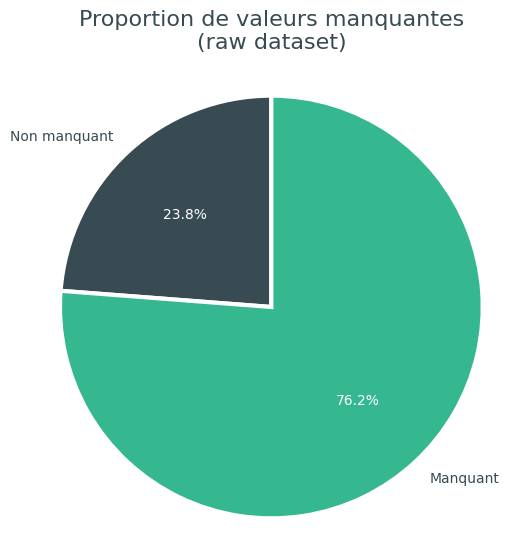

In [10]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(raw dataset)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

In [11]:
# Information on data quality
print("Nb de colonne sans données: {}".format(df_food.columns[df_food.isnull().all()].shape[0]))
print("Nb de lignes sans données : {}".format(df_food.isna().all(axis=1).sum()))
print("Nb de lignes dupliquées : {}".format(df_food.duplicated().sum()))
print("Nb d'identifiant uniques dupliqués' : {}".format(df_food["code"].duplicated().sum()))

Nb de colonne sans données: 16
Nb de lignes sans données : 0
Nb de lignes dupliquées : 0
Nb d'identifiant uniques dupliqués' : 22


## **2. Nettoyage des données**
***

Dans un premier temps, il s'agit de supprimer les variables inutiles et les données qui ne comportent pas suffisemment d'informations pour être exploiter. Un seuil de 25% de données disponible est fixé pour la sélection des variables. Afin de promouvoir les produits locaux, seul les produits issus des territoires français seront sélectionnés.

### **1. Suppression des données inexploitables**

Pour commencer, les colonnes n'ayant aucune valeurs sont supprimées.

In [12]:
# Delete columns containing only null values
df_food.dropna(axis=1, how="all", inplace=True)

In [13]:
df_food.dropna(axis=1, how="all", inplace=True)

Puis, l'analyse du taux de remplissage par variables permet de visualiser la qualité du jeu de donnée et d'observer les colonnes concernés par le seuil de 25% établis précédemment.

In [14]:
# Instantiation of the percentage of missing values for each column
null_value_rates = df_food.notnull().mean()*100
# Missing data formatted as a DataFrame (in descending order)
df_null_values = pd.DataFrame({"column_name":df_food.columns,"null_value_rates":null_value_rates.values})
df_null_values = df_null_values.sort_values(by="null_value_rates",ascending=False)

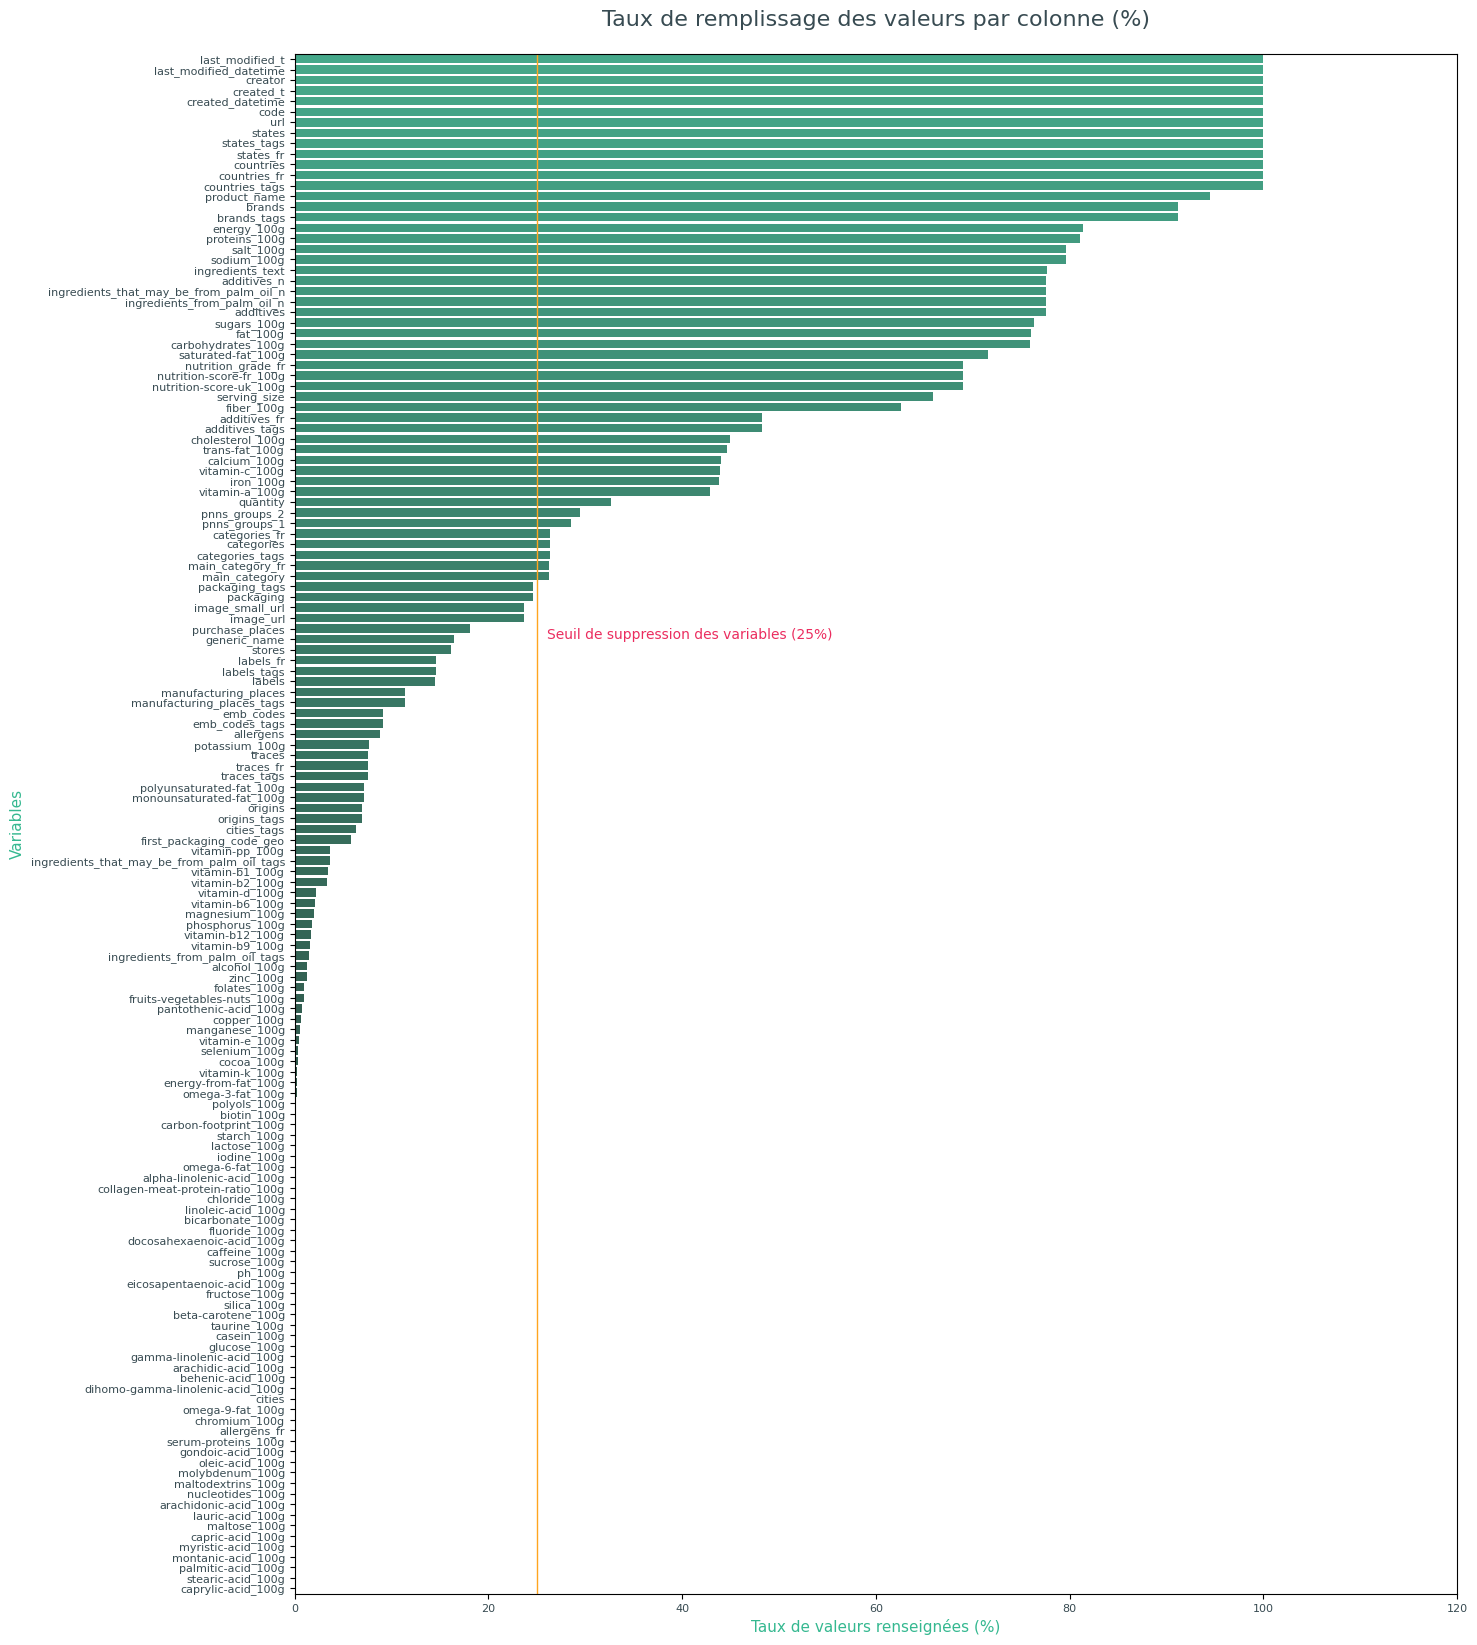

In [15]:
# Observation of zero values (average per column)
plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_null_values,x="null_value_rates",y="column_name",palette=palette_map)
plt.title("Taux de remplissage des valeurs par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=25, linewidth=1, color = '#ffa51f')
plt.text(25+1, 55, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

Visualisation de la proportions des valeurs manquantes par groupe de colonnes. En effet, nous pouvons distinguer un groupe de variables dites qualitatives et quantitatives.

In [16]:
# Check columns containing < 75% null values and uncontaing "100g"
nan_more_75_quali = df_food.loc[:, (df_food.isna().mean() > 0.75) & (~df_food.columns.str.contains("100g"))].columns
# Check columns containing < 75% null values and containg "100g"
nan_more_75_quanti = df_food.loc[:, (df_food.isna().mean() > 0.75) & (df_food.columns.str.contains("100g"))].columns

In [17]:
# Instantiation of columns into 2 distinct groups
col_quali = df_food.loc[:,~df_food.columns.str.contains("100g")].columns
col_quanti = df_food.loc[:,df_food.columns.str.contains("100g")].columns

In [18]:
# Counts the number of columns with more than 75% missing values per column group.
col_quali_deleted = col_quali.isin(nan_more_75_quali.tolist()).sum()
col_quanti_deleted = col_quanti.isin(nan_more_75_quanti.tolist()).sum()
# Counts the number of columns with +25% values per column group
col_quali_ok = len(col_quali) - col_quali.isin(nan_more_75_quali.tolist()).sum()
col_quanti_ok = len(col_quanti) - col_quanti.isin(nan_more_75_quanti.tolist()).sum()

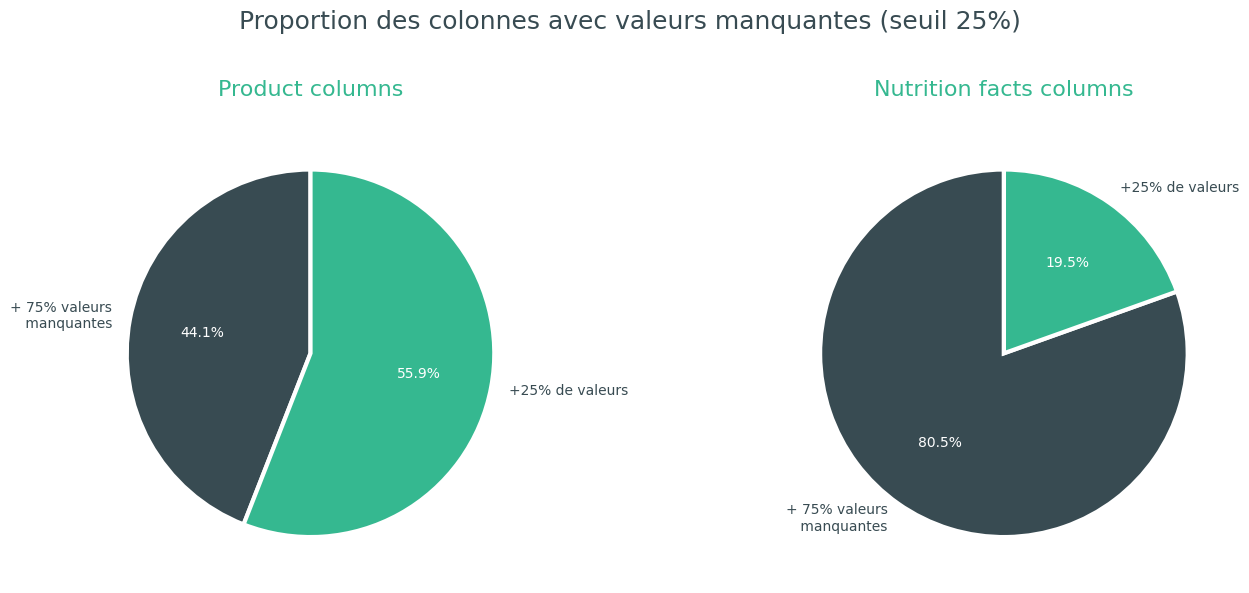

In [19]:
# Data for pie chart - qualitative columns
data_quali = [col_quali_deleted, col_quali_ok]
labels_quali = ["+ 75% valeurs\n manquantes", "+25% de valeurs"]
colors = ["#384B52", '#35B890']

# Data for pie chart - quantitative columns
data_quanti = [col_quanti_deleted, col_quanti_ok]
labels_quanti = ["+ 75% valeurs\n manquantes", "+25% de valeurs"]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Add a global title
plt.suptitle("Proportion des colonnes avec valeurs manquantes (seuil 25%)\n", fontsize=18, color="#384B52")

# Create pie chart for qualitative columns
patches, texts, autotexts = axs[0].pie(
    data_quali, labels=labels_quali,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[0].set_title("Product columns", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for qualitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Create pie chart for quantitative columns
patches, texts, autotexts = axs[1].pie(
    data_quanti, labels=labels_quanti,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[1].set_title("Nutrition facts columns", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for quantitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Brève analyse des colonnes ne respectant pas le seuil de 25% afin d'identifier la présence d'informations pertinentes avant leur suppressions.

In [20]:
# Check values on allergens column
df_food.loc[df_food["allergens"].notnull(),["code","allergens"]].sample(5)

,code,allergens
189103,NaN,http://fr.openfoodfacts.org/images/products/30...
237810,3560070254699,"sulfites, blé, lait"
291159,7612100066430,"lait, noisettes, lait, lait, orge, lactosérum,..."
311151,8480000340276,Anacardos
191316,3046920074018,"noisettes, noisettes, lactose, lait, noisettes..."


In [21]:
# Check values on ingredients_from_palm_oil_tags column
df_food.loc[df_food["ingredients_from_palm_oil_tags"].notnull(),["code","ingredients_from_palm_oil_tags"]].sample(5)

,code,ingredients_from_palm_oil_tags
111888,017760598095,huile-de-palme
184925,26039688,huile-de-palme
196836,3173286414070,huile-de-palme
260591,4016249010201,huile-de-palme
231185,3410280020532,huile-de-palme


In [22]:
# Check values on traces_fr column
df_food.loc[df_food["traces_fr"].notnull(),["code","traces_fr"]].sample(5)

,code,traces_fr
204760,3248830692287,"Céleri,Crustacés,Œufs,Poisson,Mollusques,Mouta..."
236255,3512690001191,"Céleri,Gluten,Lait,Anhydride sulfureux et sulf..."
37422,0041036011448,"Gluten,Lait"
198722,3182280057565,Soja
230402,3392460510296,Fruits à coque


La vérification des colonnes qui ne respectent pas le seuil de 25% de données renseignées permet d'identifier 3 variables pertinentes. Ainsi, les informations sur les allergènes, les traces éventuelles de produits connexes et la présence d'huile de palme sont sauvegardés. La présence d'un grand nombre de valeurs manquantes pour ces variables n'est pas synonyme d'un manque d'information mais signifie que peu de produits sont concernés par ces informations.

In [23]:
# Selection of columns potentially useful for analysis
columns_to_keep = ["allergens","traces_fr","ingredients_from_palm_oil_tags"]

La suppression des colonnes qui ne respecte pas le seuil de 25% peut maintenant être effectuée en conservant les 3 variables identifiées précedemment.

In [24]:
# Selection of columns containing < 75% null values and columns_to_keep
df_food = df_food.loc[:, (df_food.isna().mean() < 0.75) | (df_food.columns.isin(columns_to_keep))]

Contrôle de la proportion de valeurs manquantes après la suppression des colonnes ne dépassant la valeur seuil.

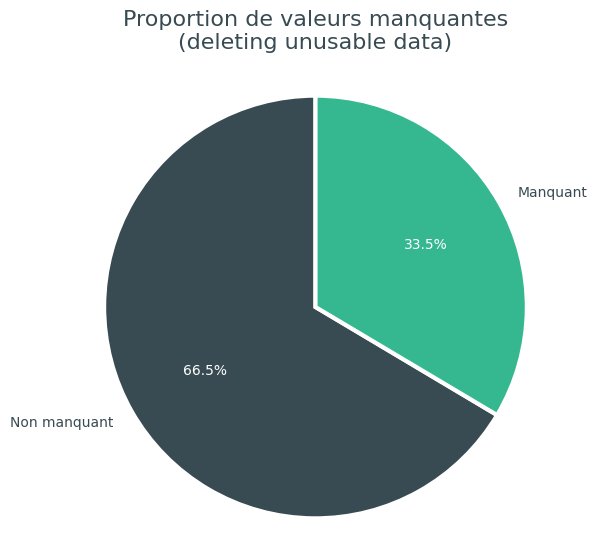

In [25]:
# Calculation of the average percentage of missing values
missing_percentage = df_food.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(deleting unusable data)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

### **2. Sélection des produits issus des territoires français**

Maintenant que les données inexploitables sont écartées, la prochaine étapes consiste à sélectionner les produits issus des territoires français. Les territoires sont répertoriés sur le site web de l'INSEE à <a href="https://www.insee.fr/fr/metadonnees/definition/c1696">cette page</a> et serviront de référence pour filtrer les produits de la base de données.

Pour commencer, les lignes qui n'ont pas d'informations sur la provenance des produits sont supprimées.

In [26]:
# Delete rows for null values in countries_fr columns
df_food.dropna(subset="countries_fr", axis=0, inplace=True)

Puis les produits issus des territoires français sont sélectionnés afin d'obtenir un jeu de données conforme à nos besoins.

In [27]:
# Data selection for French countries only
df_food_fr = df_food.loc[df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin")]

Ensuite, il est intéressant de visualiser la proportion de produits issus des territoires français par rapport au reste du monde.

In [28]:
# Instantiation of entries containing the name of a French territory
list_fr_countries = df_food_fr["countries_fr"].unique().tolist()

In [29]:
# Source categorisation function
def country_categ(country):
    if country in list_fr_countries:
      return "Territoires français"
    else:
      return "Reste du monde"

In [30]:
# Create a dataframe for analysis
df_proportion_french_products = pd.DataFrame(columns=["provenance"])
# Apply the function to obtain the origin of the products
df_proportion_french_products["provenance"] = df_food["countries_fr"].apply(country_categ)

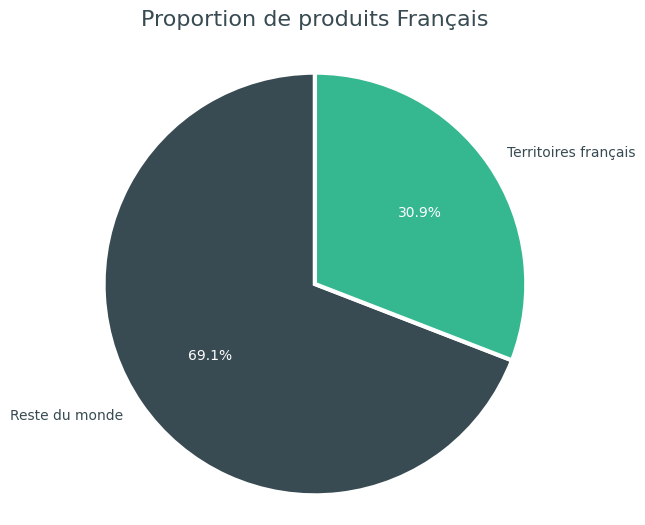

In [31]:
# Count the number of products by origin
provenance_counts = df_proportion_french_products["provenance"].value_counts()
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    provenance_counts, labels=provenance_counts.index,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de produits Français",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

Contrôle de la proportion de valeurs manquantes après la sélection des produits issus des territoires français

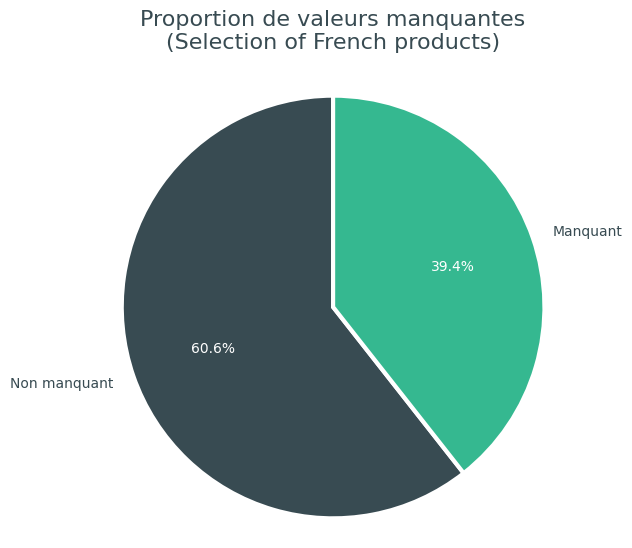

In [32]:
# Calculation of the average percentage of missing values
missing_percentage = df_food_fr.isna().mean().mean()*100
# Calculation of the proportion of non-missing values
non_missing_percentage = 100 - missing_percentage

# Data for pie chart
data = [non_missing_percentage, missing_percentage]
labels = ["Non manquant", "Manquant"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de valeurs manquantes\n(Selection of French products)",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

### **3. Gestion des données par catégorie (quali/quanti)**

Les données inexploitables étant exclues, il est nécessaire de faire le tri des variables en sélectionnant les plus pertinentes pour le projet. Pour cela, la <a href="https://world.openfoodfacts.org/data/data-fields.txt">page de description des variables</a> sert de support méthodologique. Pour commencer, il est intéressant d'afficher la proportion des variables par catégorie. 

In [33]:
col_quali = len(df_food_fr.loc[:,~df_food.columns.str.contains("100g")].columns)
col_quanti = len(df_food_fr.loc[:,df_food.columns.str.contains("100g")].columns)

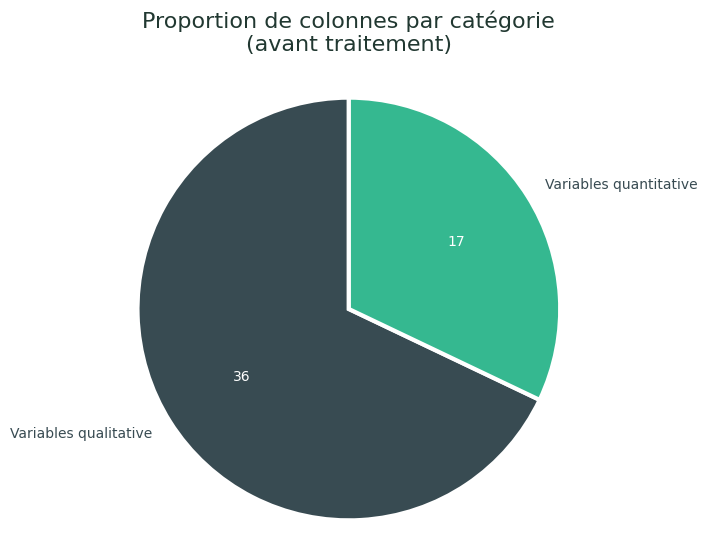

In [34]:
# Category names for display
categories = ["Variables qualitative", "Variables quantitative"]
# Number of columns in each category
data = [col_quali, col_quanti]

# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=categories,
    startangle=90, colors=colors, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion de colonnes par catégorie\n(avant traitement)",pad=20,color="#213831",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

#### **A. Traitement des informations produit** (variables qualitatives)

##### **1. Pertinence des informations** (variables qualitatives)

In [35]:
#### A. Traitement des informations produit (variables qualitatives)

Ensuite, les généralités donnent des renseignements sur les données et nous permettent d'identifier certaines variables qui ne correspondent pas au projet d'application. Ainsi, les variables  temporelles (`_t` et `_datetime`)et la quantité d'un nutriment pour une portion (`serving_`) peuvent être supprimés. De plus, la sélection des produits issus des territoires français étant déjà réalisée, les colonnes `countries` peuvent être supprimées également.

In [36]:
# Instantiation of columns to be deleted 
drop_columns = df_food_fr.columns[df_food_fr.columns.str.contains(r"_t$|_datetime$|serving_|countries")].tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=drop_columns)

L'analyse des variables contenant `_tags` permet d'identifier la redondance des informations avec d'autres variables, elles sont donc supprimées également. 

In [37]:
# Value analysis for columns containing "tags
df_food_fr.loc[:,df_food_fr.columns.str.contains("_tags")].sample(3)

,brands_tags,categories_tags,additives_tags,ingredients_from_palm_oil_tags,states_tags
213019,cora,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,"en:to-be-checked,en:complete,en:nutrition-fact..."
203902,carrefour,"en:meals,en:gratins,fr:macaroni-prepares,fr:pl...",en:e415,NaN,"en:to-be-checked,en:complete,en:nutrition-fact..."
212826,cora,"en:plant-based-foods-and-beverages,en:beverage...","en:e330,en:e300",NaN,"en:to-be-checked,en:complete,en:nutrition-fact..."


In [38]:
# Instantiation of columns containing "tags
col_tags = df_food_fr.loc[:,df_food_fr.columns.str.contains("_tags")].columns.tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=col_tags)

Dans le cadre d'une politique nutritionnelle, l'état français a lancé en 2001 le <a href="https://www.mangerbouger.fr/ressources-pros/le-programme-national-nutrition-sante-pnns/qu-est-ce-que-le-pnns">Programme National Nutrition Santé (PNNS)</a> avec pour objectif l'amélioration de l'état de santé de l'ensemble de la population. "Ce programme a été reconduit en 2006 (PNNS-2), en 2011 (PNNS-3) et en 2019 (PNNS-4)". 
Les données contiennent deux variables `pnns_groups` qui sont normalisées au titre du Plan national de santé publique. La PNNS-2 étant le plus récent, cette variable est conservée pour la catégorisation des produits. Ainsi, les variables `categories`, `_category` et `pnns_groups_1` peuvent être supprimées.

In [39]:
# Instantiation of columns containing "tags
col_categ = df_food_fr.loc[:,df_food_fr.columns.str.contains("categories|category|pnns_groups_1")].columns.tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=col_categ)

Analyse du taux de remplissage des dernières colonnes pour s'assurer de leurs pertinence.

In [40]:
# Instantiation of the percentage of missing values for each column
null_values = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")].notnull().mean().sort_values(ascending=False)
null_values = null_values.reset_index()
# Rename the columns
null_values.columns = ["column_name", "null_value_rates"]

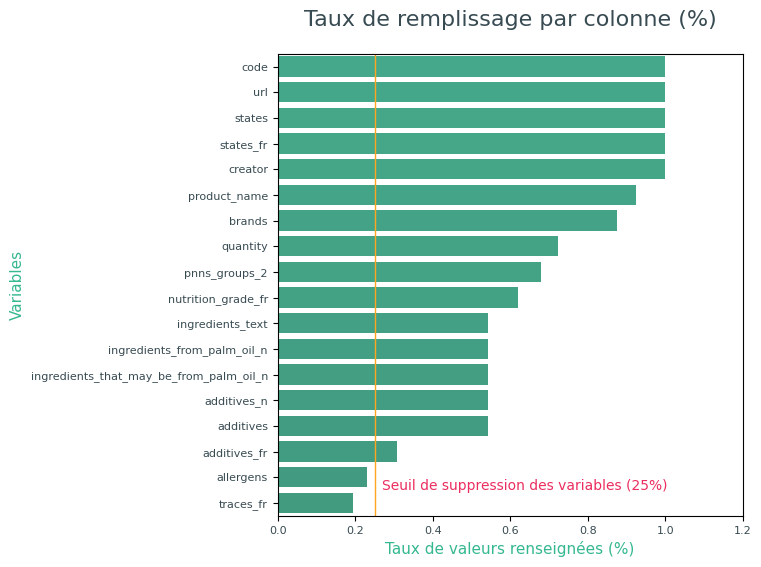

In [41]:
# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=null_values,x="null_value_rates",y="column_name",palette=palette_map)
plt.title("Taux de remplissage par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=0.25, linewidth=1, color = '#ffa51f')
plt.text(0.25+0.02, 16.5, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

L'analyse montre un taux de remplissage identique pour les variables contenant `from_palm_oil`. Elle met également en avant des variables redondantes (`additives`,`states`) et des variables qui ne semblent pas pertinentes (`url`,`creator`,`brands`) pour le projet d'application. Ces variables sont observées pour juger de leurs pertinences.

In [42]:
df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")].sample(3)

,code,url,creator,product_name,quantity,brands,ingredients_text,allergens,traces_fr,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_2,states,states_fr
224209,3302743329026,http://world-fr.openfoodfacts.org/produit/3302...,openfoodfacts-contributors,Crevettes et pâtes colletti crème aux tomates ...,280 g,Fleury michon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b,One-dish meals,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl..."
274612,5060139660112,http://world-fr.openfoodfacts.org/produit/5060...,kiliweb,Lazy Days Millionaires Shortbread Slices,NaN,Very lazy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e,NaN,"en:to-be-completed, en:nutrition-facts-complet...","A compléter,Informations nutritionnelles compl..."
205758,3250390605898,http://world-fr.openfoodfacts.org/produit/3250...,date-limite-app,Petit Suisse 0 % Mg,360 g (6 x 60 g),Pâturages,Fromage frais nature au _lait_ écrémé pasteuri...,lait,NaN,1.0,[ fromage-frais-nature-au-lait-ecreme-pasteur...,E203 - Sorbate de calcium,0.0,0.0,a,Dairy desserts,"en:to-be-checked, en:complete, en:nutrition-fa...","A vérifier,Complet,Informations nutritionnelle..."


Le contenu des variables restantes démontrent qu'il reste des variables non pertinentes pour le projet. Pour rappel, le projet consiste à proposer des menus plus équilibrés que ceux consommer initialement. 

Ainsi, le lien vers le produits (`url`), le créateur de la page produit (`creator`) et l'état de la fiche produit sont inutiles (`states`,`states_fr`). De plus, les propositions de menus seront basés sur la quantité de nutriments pour 100g. Cela exclu les varibales de quantité (`quantity`) qui donne le poid du produit à l'achat et le détail des ingrédients ainsi contenu dans le produit (`ingredients_text`) ainsi que les traces éventuelles d'autre sproduits (`traces_fr`), qui peuvent être des informations intéressantes dans un projet plus avancé... Enfin, les variables `additives` sont redondantes, le projet étant construit sur des produits issus de territoires français, seule la variables `additives_fr` sera conservée.

In [43]:
# Instantiation of columns containing "may_be_from_palm_oil"
col_irrelevant = df_food_fr.loc[:,df_food_fr.columns.str.contains("may_be_from_palm_oil|url|creator|quantity|ingredients_text|traces_fr|states|additives_n|additives$")].columns.tolist()
# Deleting columns
df_food_fr = df_food_fr.drop(columns=col_irrelevant)

##### **2. Nettoyage et mise en forme des données** (variables qualitatives)

Les variables `code` et `product_name` sont les identifiants unique de chaque produits. Ainsi, les doublons et valeurs manquantes seront supprimés après l'analyse du taux de valeurs manquantes. 

In [44]:
# Sum of duplicated values
nb_duplicated = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")][["product_name","code"]].duplicated().sum()
print("Nombre de valeurs dupliquée: {}".format(nb_duplicated))

Nombre de valeurs dupliquée: 0


In [45]:
# Counts the number of missing values
missing_percentage_product = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")]["product_name"].isnull().sum()
missing_percentage_code = df_food_fr.loc[:,~df_food_fr.columns.str.contains("100g")]["code"].isnull().sum()
# Counts the number of values entered
non_missing_percentage_product = len(df_food_fr) - missing_percentage_product
non_missing_percentage_code = len(df_food_fr) - missing_percentage_code

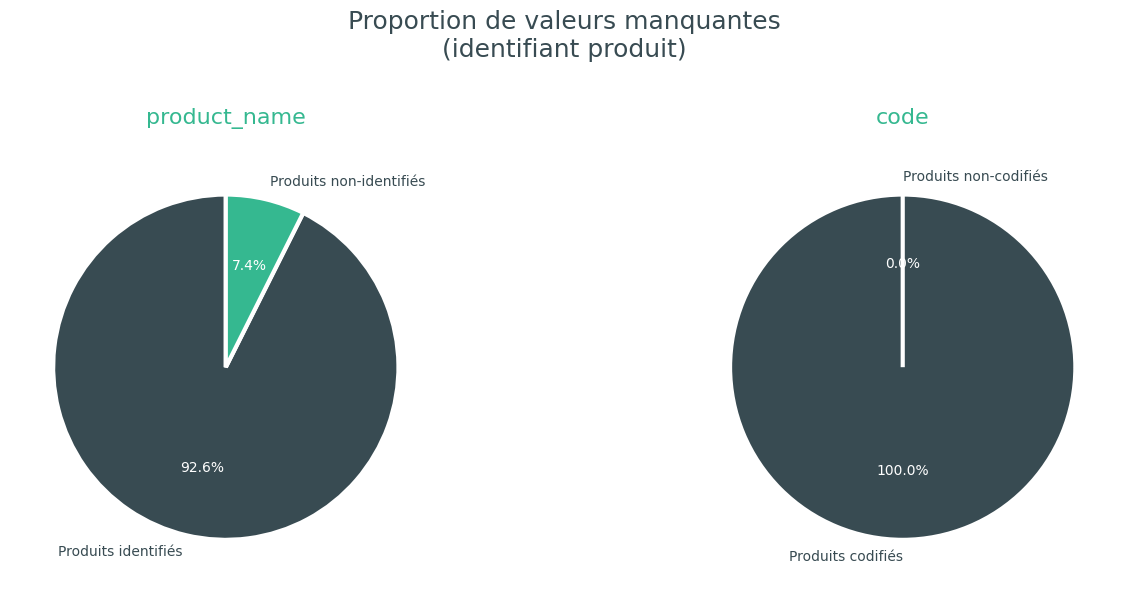

In [46]:
# Data for pie chart - qualitative columns
data_product = [non_missing_percentage_product, missing_percentage_product]
labels_product = ["Produits identifiés", "Produits non-identifiés"]

# Data for pie chart - quantitative columns
data_code = [non_missing_percentage_code, missing_percentage_code]
labels_code = ["Produits codifiés", "Produits non-codifiés"]

colors = ["#384B52","#35B890"]
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Add a global title
plt.suptitle("Proportion de valeurs manquantes\n(identifiant produit)\n", fontsize=18, color="#384B52")

# Create pie chart for qualitative columns
patches, texts, autotexts = axs[0].pie(
    data_product, labels=labels_product,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[0].set_title("product_name", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for qualitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Create pie chart for quantitative columns
patches, texts, autotexts = axs[1].pie(
    data_code, labels=labels_code,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops={"linewidth": 3, "edgecolor": "white"})
axs[1].set_title("code", pad=20, color="#35B890", fontsize=16)

# Set custom label colors and sizes for quantitative pie chart
for text in texts:
    text.set_color("#384B52")
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(10)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

L'analyse montre qu'il n'y a pas de valeurs dupliquées pour ces variables mais indique que certains produits n'ont pas de nom (`product_name`), ils sont donc supprimés de la base de données.

In [47]:
# Delete lines containing missing values
df_food_fr = df_food_fr.dropna(subset="product_name")

La présence d'allergènes ou d'additifs est une information pertinente mais il n'est pas nécessairement utile d'avoir les détails pour le projet. Ainsi, les valeurs sont remplacées par `1` et `0` lorsqu'il n'y a pas de valeurs. Il en va de même pour la présence d'huile de palme, en précisant que la valeur 0 signifie une absence d'huile de palme; cette valeur est donc remplacée par une valeur manquante et les données sont formater sous la forme `1` ou `0` également. Par soucis de clarté, les valeurs de qualité nutritionnelle sont transformés en majuscule.

In [48]:
# Replace NaN values with 0 and non-NaN values with 1
df_food_fr["additives_fr"] = df_food_fr["additives_fr"].notnull().astype(int)
df_food_fr["allergens"] = df_food_fr["allergens"].notnull().astype(int)

In [49]:
df_food_fr.sample(5)

,code,product_name,brands,allergens,additives_fr,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_2,energy_100g,fat_100g,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
230035,3384230030264,Terrine aux tomates confites,Les Délices de Lyon,1,1,0.0,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315981,8722700083436,Tomatensuprême 515ml,Knorr,0,0,NaN,c,NaN,188.0,NaN,...,0.6,1.2,0.910,0.358268,NaN,NaN,NaN,NaN,3.0,3.0
215742,3263852666023,Mini marbré au chocolat,Leader Price,0,1,1.0,e,Biscuits and cakes,1795.0,23.0,...,1.7,4.7,0.508,0.200000,NaN,NaN,NaN,NaN,19.0,19.0
200381,3222472703594,Pizza à pâte fine Jambon Fromage,Casino,1,1,0.0,c,Pizza pies and quiche,930.0,6.7,...,2.6,9.9,1.500,0.590551,NaN,NaN,NaN,NaN,8.0,8.0
206856,3250391502837,Pâté de Tête recette persillée,Monique Ranou,0,1,0.0,d,Processed meat,862.0,16.9,...,NaN,13.0,2.040,0.803150,NaN,NaN,NaN,NaN,16.0,16.0


In [50]:
# Replace NaN values with 0 and convert to integer
df_food_fr["ingredients_from_palm_oil_n"] = df_food_fr["ingredients_from_palm_oil_n"].fillna(0).astype(int)
# Replaces the values >= 1
df_food_fr.loc[df_food_fr["ingredients_from_palm_oil_n"] >= 1, "ingredients_from_palm_oil_n"] = 1

In [51]:
# Capitalize values
df_food_fr["nutrition_grade_fr"] = df_food_fr["nutrition_grade_fr"].str.upper()

Pour terminer, la variable catégorielle (`pnns_groups_2`) contient des valeurs dupliquées en raison d'une casse différente. Elle contient également des valeurs NaN qui sont remplacées par la valeur "Unknown" déjà existante. 

In [52]:
# Transformation into capital letters
df_food_fr["pnns_groups_2"] = df_food_fr["pnns_groups_2"].str.capitalize()
# Replace the zero values per Unknown                             
df_food_fr["pnns_groups_2"].replace(np.nan, "Unknown", inplace=True)

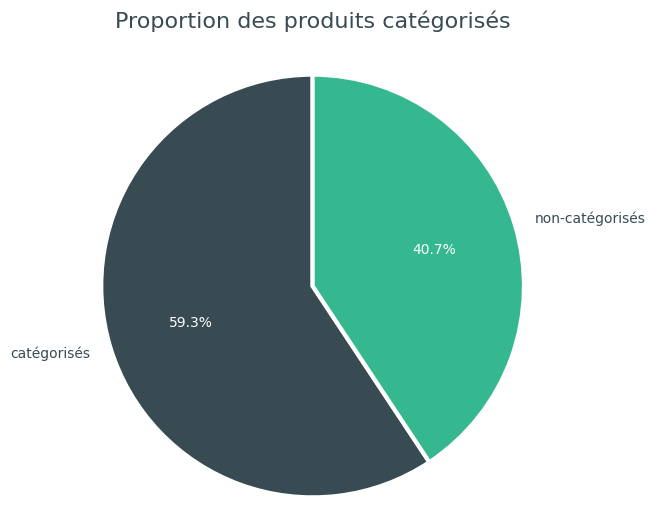

In [53]:
# Calculation of the number of uncategorized products
not_product_categ = df_food_fr["pnns_groups_2"].str.contains("Unknown").sum()
# Calculation of the number of categorized products
product_categ = len(df_food_fr) - not_product_categ

# Data for pie chart
data = [product_categ, not_product_categ]
labels = ["catégorisés", "non-catégorisés"]
# Define color code
colors = ["#384B52",'#35B890']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 3, "edgecolor": "white"})
# Set title on pie chart
plt.title("Proportion des produits catégorisés",pad=20,color="#384B52",fontsize=16)
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#384B52", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

#### **B. Traitement des valeurs nutritionnelles** (variables quantitatives)

Etant donnée que nos produits sont exclusivement issus des territoires français, la variable `nutrition-score-uk_100g` est supprimée.

In [54]:
# Delete column
df_food_fr = df_food_fr.drop(columns="nutrition-score-uk_100g")

Analyse du taux de remplissage des colonnes pour s'assurer de la pertinence des variables restantes.

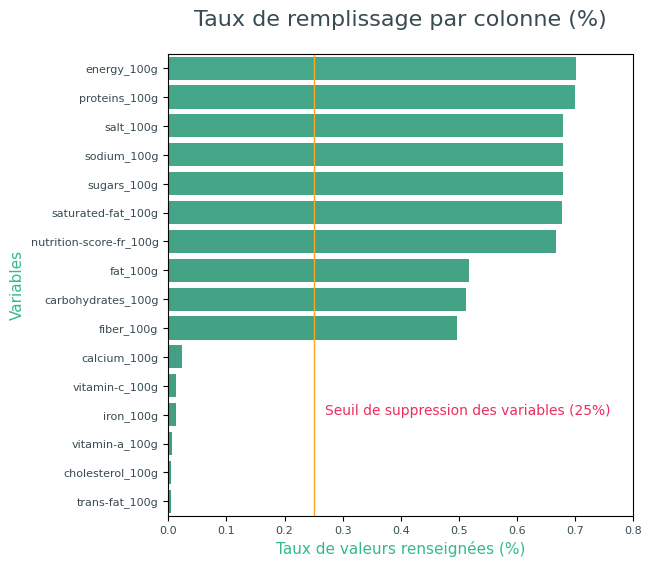

In [55]:
# Instantiation of the percentage of missing values for each column
null_values = df_food_fr.loc[:,df_food_fr.columns.str.contains("100g")].notnull().mean().sort_values(ascending=False)
null_values = null_values.reset_index()
# Rename the columns
null_values.columns = ["column_name", "null_value_rates"]
# Observation of zero values (average per column)
plt.figure(figsize=(6,6))
ax = sns.barplot(data=null_values,x="null_value_rates",y="column_name",palette=palette_map)
plt.title("Taux de remplissage par colonne (%)",pad=20,color="#384B52",fontsize=16)
# Display of a threshold line
plt.axvline(x=0.25, linewidth=1, color = '#ffa51f')
plt.text(0.25+0.02, 12, 'Seuil de suppression des variables (25%)', fontsize = 10, color = '#EB2D5F')
# Specifies the location of x-axis labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), color='#384B52', fontsize=8)
# Specifies the location of y-axis labels
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), color='#384B52', fontsize=8)
# Customise x and y axis labels
plt.xlabel("Taux de valeurs renseignées (%)",color='#35B890', fontsize=11)
plt.ylabel("Variables",color='#35B890', fontsize=11)
plt.show()

Plusieurs variables sont en deça du seuil de 25% de valeurs renseignés, elles sont inexploitables et donc supprimées du jeu de données.

In [56]:
# Filter columns with "100g"
col_100g = df_food_fr.columns[df_food_fr.columns.str.contains("100g")]
# Selects variables > 25% of values filled in
col_100g_75_nan = col_100g[df_food_fr[col_100g].notnull().mean() < 0.25]
# Delete column
df_food_fr = df_food_fr.drop(columns=col_100g_75_nan)

Ensuite, les colonnes avec le suffixes `_100g` (hors `ernergy_100g`) doivent contenir des valeurs >= 100. Ainsi, toutes les valeurs dépassants ce seuil sont remplacés par `NaN`. Il en va du même principe pour la variable `ernergy_100g` qui ne peut être supérieur à 3800kJ puisque l'apport énergétique approximatif par gramme de lipides est de 38kJ/g (<a href="[Composition nutritionnelle des aliments](https://fr.wikipedia.org/wiki/Composition_nutritionnelle_des_aliments)">source wikipédia</a>).

In [57]:
# Instantiation of nutritional columns 100g
nutrition_columns = df_food_fr.loc[:,df_food_fr.columns.str.contains("100g")].drop(columns=["energy_100g","nutrition-score-fr_100g"]).columns.tolist()

In [58]:
# Check for values > 100
nb_outlier_100g = (df_food_fr[nutrition_columns]>100).sum()
nb_outlier_100g[nb_outlier_100g > 0]

fat_100g              2
saturated-fat_100g    1
carbohydrates_100g    7
sugars_100g           3
fiber_100g            1
salt_100g             2
dtype: int64

In [59]:
# Replace the values > 100 per NaN
df_food_fr[nutrition_columns] = df_food_fr[nutrition_columns].where(df_food_fr[nutrition_columns] < 100, np.nan)

In [60]:
# Count the number of values > 3800
nb_outlier_100g = (df_food_fr["energy_100g"]>3800).sum()
print("Nb de valeur > 3800 kJ: {}".format(nb_outlier_100g))

Nb de valeur > 3800 kJ: 90


In [61]:
# Replace the values > 3800 per NaN
df_food_fr.loc[df_food_fr["energy_100g"] > 3800, "energy_100g"] = np.nan

## Outliers

KeyError: "['sodium_100g'] not in index"

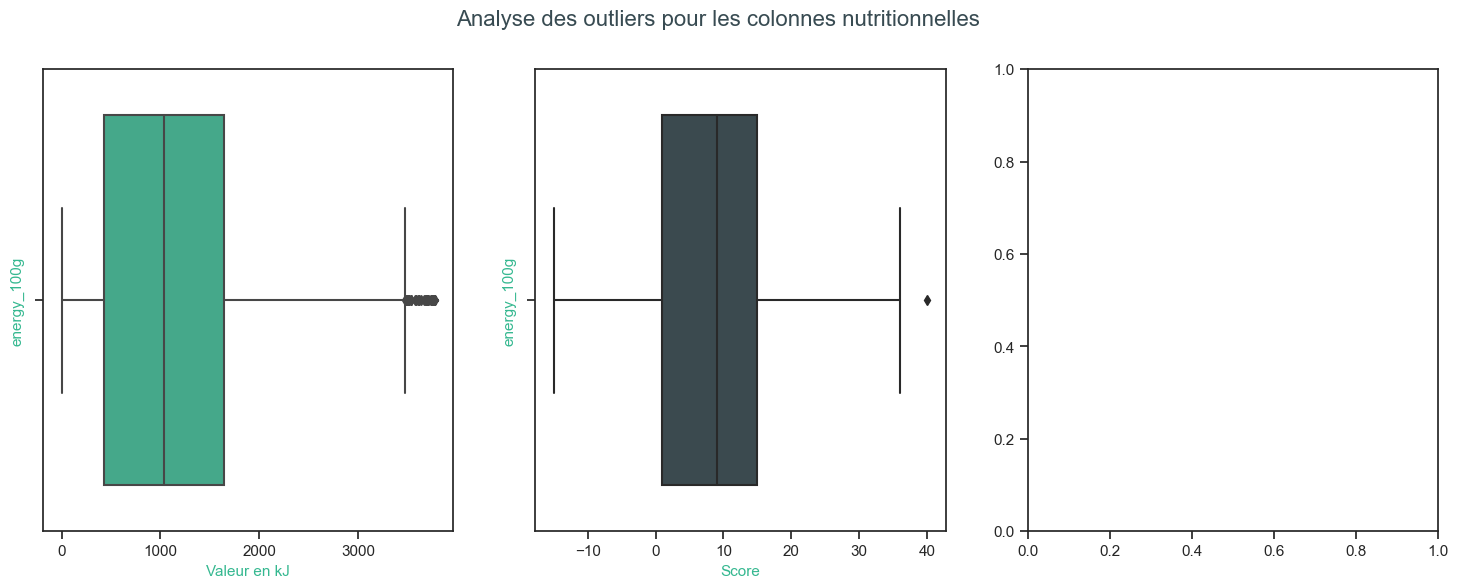

In [141]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Add a global title above the subplots
fig.suptitle("Analyse des outliers pour les colonnes nutritionnelles", fontsize=16, color="#384B52")

# Plot the first boxplot
sns.boxplot(data=df_food_fr, x="energy_100g", ax=axes[0], color="#35B890")
axes[0].set_xlabel("Valeur en kJ", color='#35B890', fontsize=11)
axes[0].set_ylabel("energy_100g", color='#35B890', fontsize=11)

# Plot the second boxplot
sns.boxplot(data=df_food_fr, x="nutrition-score-fr_100g", ax=axes[1], color="#384B52")
axes[1].set_xlabel("Score", color='#35B890', fontsize=11)
axes[1].set_ylabel("energy_100g", color='#35B890', fontsize=11)

# Select 5 random colors from your palette
random_colors = random.sample(palette_map, len(nutrition_columns))

# Plot the third boxplot
sns.boxplot(data=df_food_fr[nutrition_columns].dropna(), ax=axes[2], palette=random_colors, orient="h")
axes[2].set_xlabel("Apports nutritionnels pour 100g (g)", color='#35B890', fontsize=11)
axes[2].set_ylabel("Variables", color='#35B890', fontsize=11)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
plt.show()

<Figure size 1500x2000 with 0 Axes>

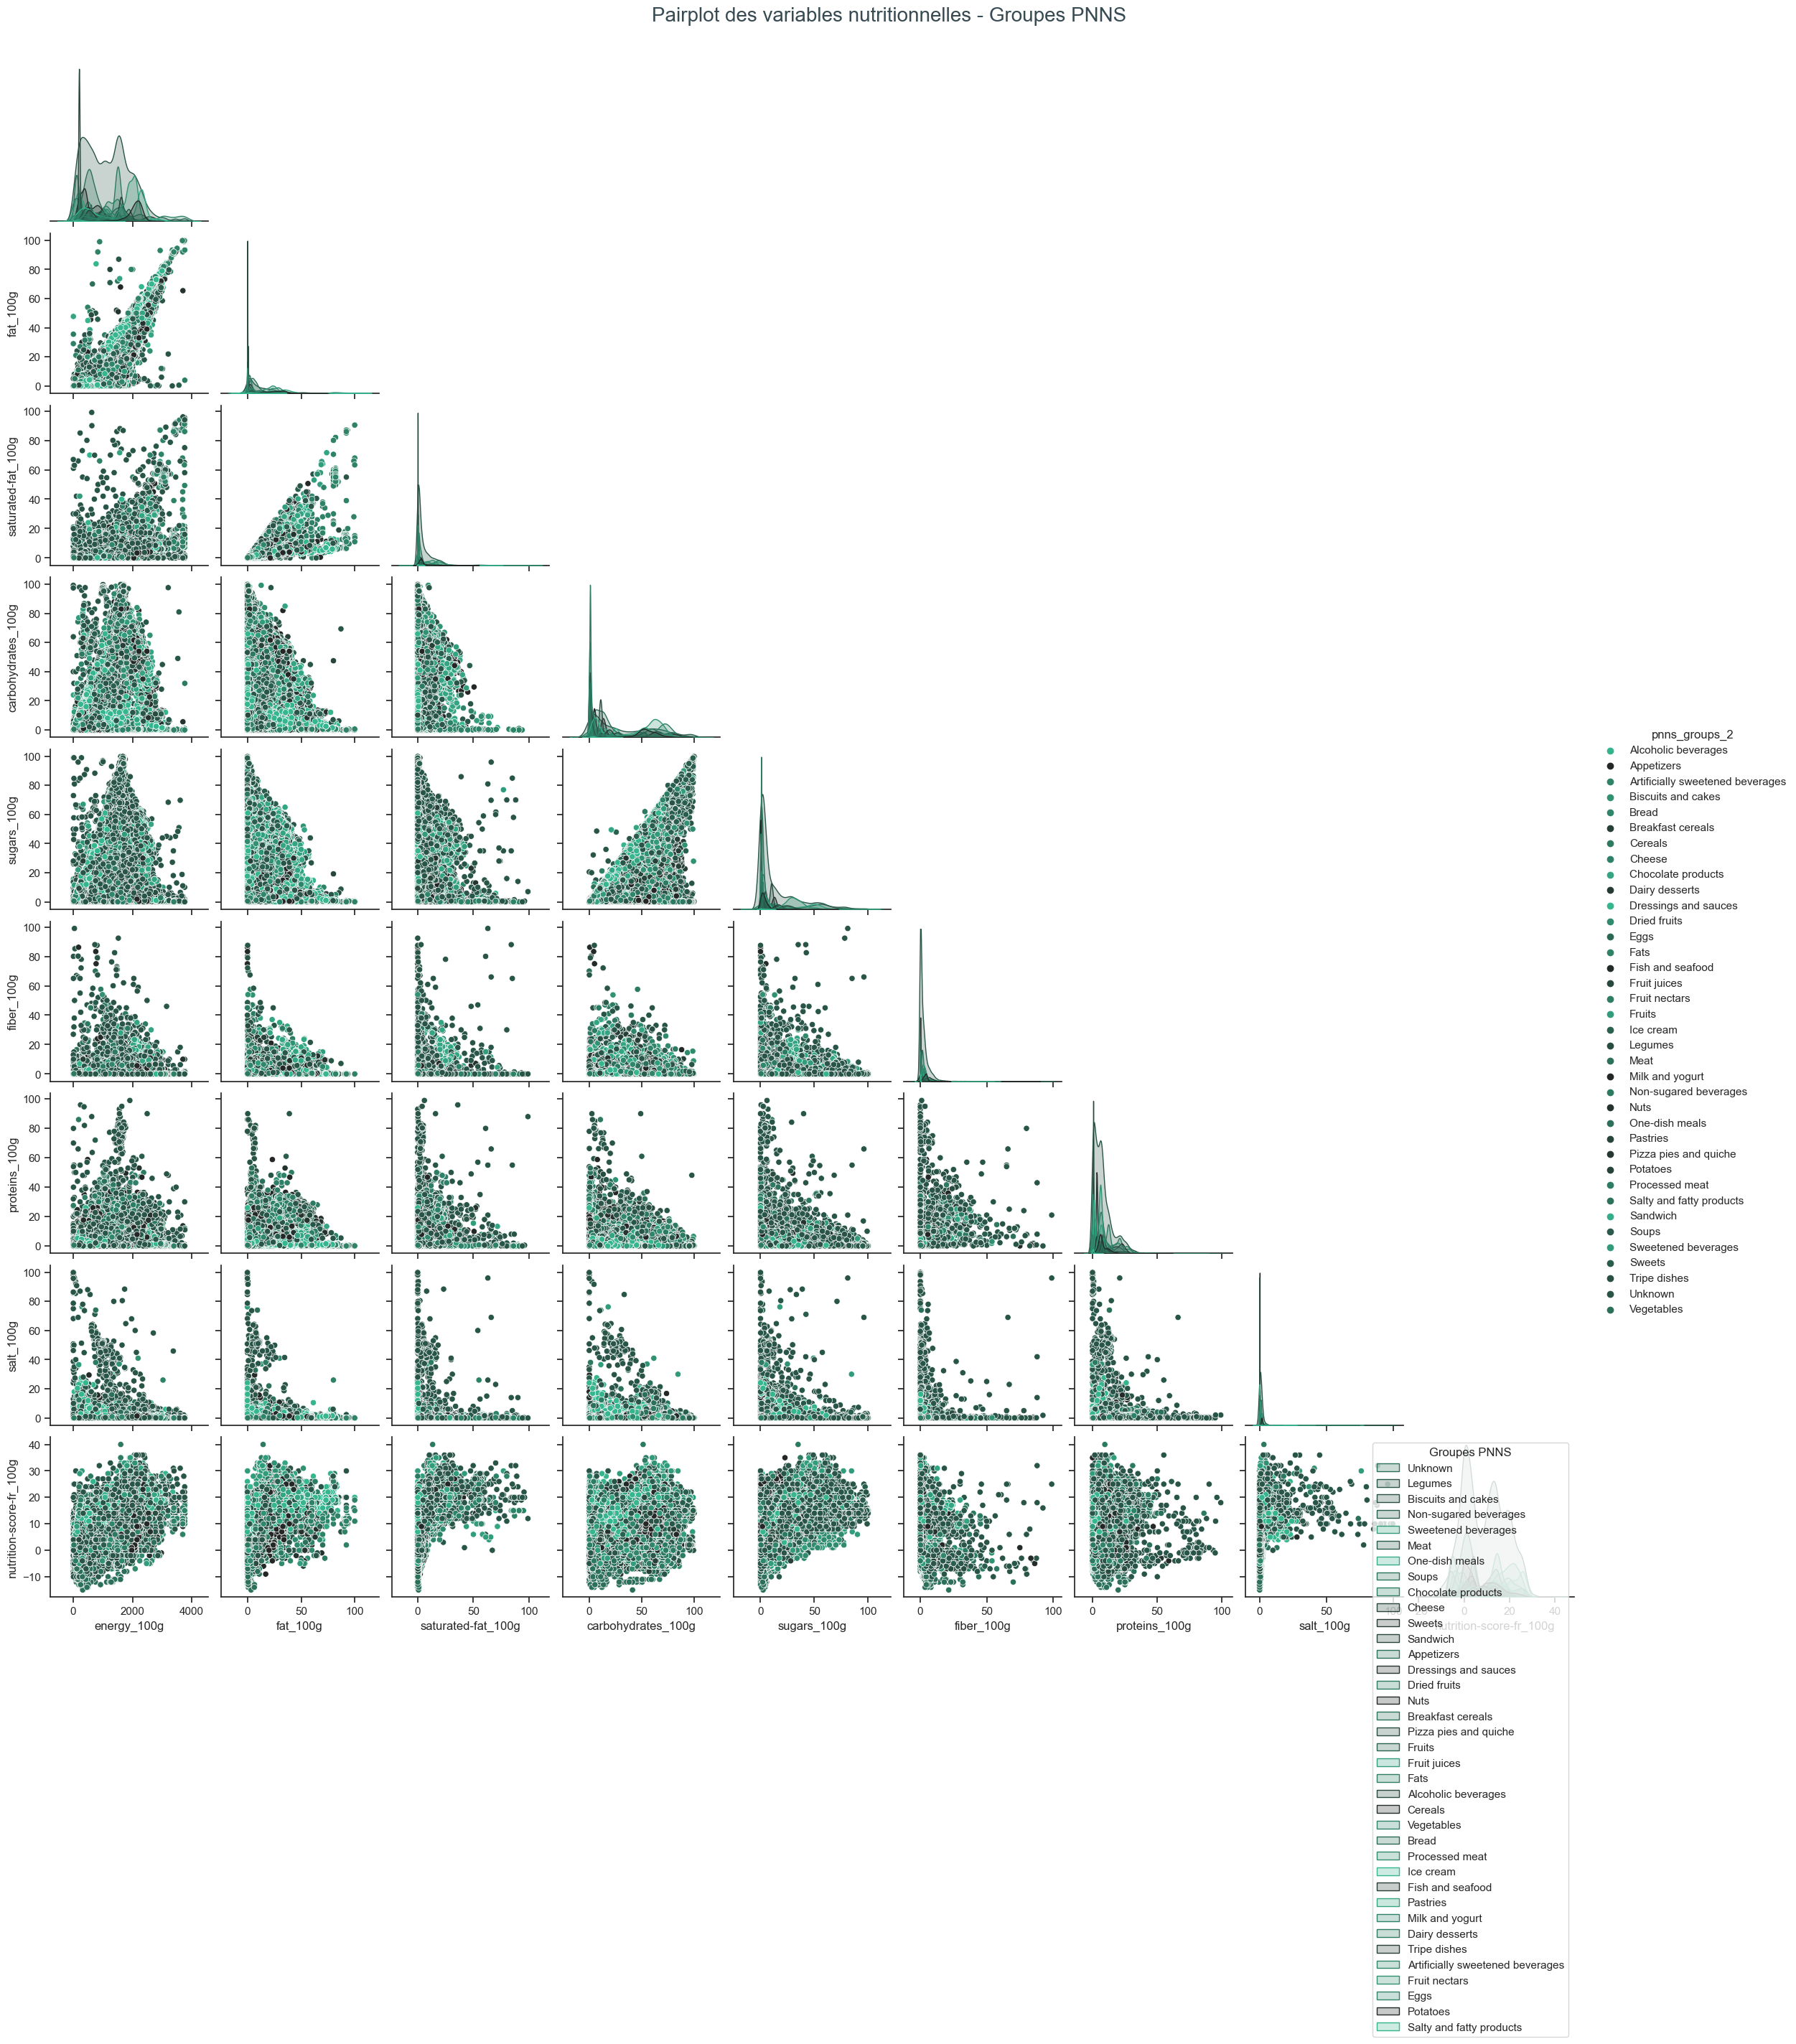

In [136]:
# Select columns containing "100g" or "pnns_groups_2"
df_pairplot = df_food_fr.loc[:, df_food_fr.columns.str.contains("100g") | (df_food_fr.columns == "pnns_groups_2")]
# Select random colors from my palette
random_colors = random.sample(palette_map, len(df_pairplot.loc[:,"pnns_groups_2"].unique()))

# Set up the figure size
plt.figure(figsize=(15,20))
# Create the pairplot with the custom palette
pairplot = sns.pairplot(df_pairplot, corner=True, hue="pnns_groups_2", palette=random_colors)

# Set the global title
plt.suptitle("Pairplot des variables nutritionnelles - Groupes PNNS", y=1.02, fontsize=20, color="#384B52")

# Display the plot
plt.show()

### **Outliers - salt_100g et sodium_100g**

Dans les faits, **40 % du poids du sel est constitué de sodium** et cela se constate par une relation linéaire "parfaite" entre les variables `salt_100g` et `sodium_100g`. Ainsi, l'une des colonne peut être supprimée sans avoir d'impact sur la qualité des informations nutriotionnelles lié au sel.

In [128]:
# Deleting the sodium column
df_food_fr = df_food_fr.drop(columns="sodium_100g", axis=1)

### **Outliers - saturated-fat_100g et fat_100g**

La relation entre les graisses et les graisses saturées est de la même nature que celle entre le sel et le sodium, à la différence que la relation n'est pas parfaitement linéaire. La relation entre ses deux nutriments se réfère généralement à la proportion de graisses saturées dans l'apport total en graisses. Ainsi, la quantité de graisses saturées ne peut être supérieur à celle des graisses, ces valeurs sont remplacés par `NaN`.

In [132]:
# Eliminating saturated fats > Fat values
df_food_fr.loc[df_food_fr["saturated-fat_100g"] > df_food_fr["fat_100g"],["saturated-fat_100g", "fat_100g"]] = np.nan

### **Outliers - carbohydrates_100g et sugars_100g**

De même, dans la littérature scientifique, il existe une relation étroite entre les hydrates de carbone et le sucre. Les hydrates de carbone (également appelés glucides) sont une classe de composés chimiques qui comprennent différents types de sucres. Les sucres, quant à eux, sont un sous-groupe des hydrates de carbone. Le sucre que nous consommons généralement dans notre alimentation quotidienne est principalement du saccharose, un disaccharide composé de glucose et de fructose. Ainsi, la quantité de sucre ne peut être supérieur à celle des hydrates de carbone, dans le cas contraire le valeurs sont rmeplacées par `NaN`.

In [137]:
# Eliminating sugars > carbohydrates values
df_food_fr.loc[df_food_fr["sugars_100g"] > df_food_fr["carbohydrates_100g"],["sugars_100g", "carbohydrates_100g"]] = np.nan

In [ ]:
# z-score
(10.9-0.046)/0.135

### Outliers - fiber_100g

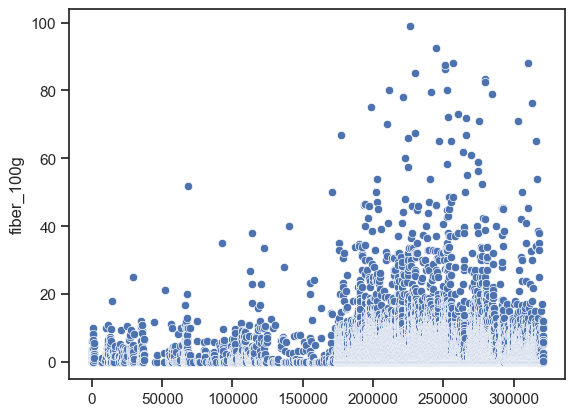

In [140]:
sns.scatterplot(df_food_fr["fiber_100g"])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [139]:
df_food_fr.loc[:,df_food_fr.columns.str.contains("100g")]

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,1883.0,20.00,12.5,70.00,57.5,2.5,2.50,0.09652,22.0
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,1481.0,4.17,NaN,77.08,NaN,6.2,6.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...
320761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,21.0,0.20,0.2,0.50,0.5,0.2,0.50,0.02540,2.0
320764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Deletes lines with at least 4 non-null values in columns containing "100g"
#df_food_fr.dropna(thresh=4, subset=df_food_fr.columns[df_food_fr.columns.str.contains("100g")], inplace=True)

### Outliers - nutrition-score-fr_100g

Le Nutri-Score a été mis au point par des équipes de recherche internationales indépendantes composées de scientifiques, de médecins et de nutritionnistes, pour rendre les informations nutritionnelles plus faciles à décrypter. Pour classer chaque produit, le Nutri-Score prend en compte, pour 100 grammes de produit, la teneur :

en nutriments et aliments à favoriser : fibres, protéines, fruits et légumes, légumes sec…
en nutriments à limiter : calories, acides gras saturés, sucres, sel
Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur :

du produit  le plus favorable sur le plan nutritionnel (classé A)
au produit le moins favorable sur le plan nutritionnel (classé E)
Pour tenir compte des spécificités de certaines familles d’aliments telles que les matières grasses ajoutées (beurre, huile), les fromages ou encore les boissons, la méthode de calcul du score a été adaptée. 

In [ ]:
sns.boxplot(df_food_fr["nutrition-score-fr_100g"])

In [ ]:
df_food_fr.loc[df_food_fr["nutrition-score-fr_100g"] > 35][["code","product_name","nutrition-score-fr_100g"]]

### Imputation de la moyenne globale

In [ ]:
# distribution avant imputation de la moyenne globale
for col in col_nutri:
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_food_fr, x=col)

In [ ]:
# Analyse des moyennes et ecart-type avant imputation de la moyenne globale
df_food_fr.describe()

In [ ]:
# Imputation de la moyenne général
df_mean_brut = df_food_fr.fillna(df_food_fr[col_nutri].mean())

In [ ]:
# Distribution après imputation de la moyenne globale
for col in col_nutri:
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_mean_brut, x=col)

In [ ]:
# Distribution après imputation de la moyenne globale
df_mean_brut.describe()

In [ ]:
df_food_fr.shape

## PNNS_GROUPS_2 - Imputation des valeurs manquantes

In [ ]:
df_food_fr[col_nutri].isnull().mean()

In [ ]:
col_nutri

In [ ]:
# Calcul de la moyenne des groupes de nutrition
pnns_mean = df_food_fr.loc[:, ["pnns_groups_2"] + list(col_nutri)].groupby(by="pnns_groups_2").mean()

In [ ]:
# Imputation de la valeurs moyennes pour chaque groupe
for group, means in pnns_mean.iterrows():
    mask = (df_food_fr["pnns_groups_2"] == group)
    df_food_fr.loc[mask,col_nutri] = df_food_fr.loc[mask,col_nutri].fillna(means)

In [ ]:
df_food_fr.describe()

In [ ]:
# distribution avant imputation de la moyenne globale
for col in col_nutri:
    plt.figure(figsize=(15,5))
    sns.histplot(data=df_food_fr, x=col)

## **<h1 id='test'>1. Description des données</h1>**
***